In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as po
import warnings
warnings.filterwarnings('ignore')

In [40]:
pd.set_option('display.max_columns',None)

### Adding Data
_______________________________________________________________________________________________________________________________________________

In [41]:
df=pd.read_csv(r'D:\Ducat\PROJECTS\World\world-data-2023.csv')
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [42]:
df.shape

(195, 35)

In [43]:
df.index

RangeIndex(start=0, stop=195, step=1)

### Data Cleaning
_____________________________________________________

In [44]:
df.isnull().sum()  # To check Null Values in Column

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                            

In [45]:
df.columns    # To Check Columns Name

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [46]:
df.dtypes   # To Check the data Types of the columns Values

Country                                       object
Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

In [47]:
# Removing unwanted symbols and Spaces and changing the data type to Float

numCols = [
    "Density\n(P/Km2)",
    "Agricultural Land( %)",
    "Land Area(Km2)",
    "Armed Forces size",
    "Co2-Emissions",
    "CPI",
    "CPI Change (%)",
    "Forested Area (%)",
    "Gasoline Price",
    "GDP",
    "Gross primary education enrollment (%)",
    "Gross tertiary education enrollment (%)",
    "Minimum wage",
    "Out of pocket health expenditure",
    "Population",
    "Population: Labor force participation (%)",
    "Tax revenue (%)",
    "Total tax rate",
    "Unemployment rate",
    "Urban_population",]


for col in numCols:
    df[col] = df[col].str.replace(r"[^0-9.]", "", regex=True).astype(float)


In [48]:
df.dtypes

Country                                       object
Density\n(P/Km2)                             float64
Abbreviation                                  object
Agricultural Land( %)                        float64
Land Area(Km2)                               float64
Armed Forces size                            float64
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                float64
CPI                                          float64
CPI Change (%)                               float64
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                            float64
Gasoline Price                               float64
GDP                                          float64
Gross primary education enrollment (%)       float64
Gross tertiary education enrollment (%)      f

In [49]:
# Conerting percentage values into point values

pctCols=['Agricultural Land( %)','CPI Change (%)',"Forested Area (%)",'Gross primary education enrollment (%)','Gross tertiary education enrollment (%)',
        'Population: Labor force participation (%)', 'Tax revenue (%)','Total tax rate','Unemployment rate']
df[pctCols]=df[pctCols]/100


In [50]:
# To remove unwanted Columns from Data set
df.drop(['Abbreviation','Calling Code','CPI','CPI Change (%)','Currency-Code','Gasoline Price'],axis=1,inplace=True)

In [79]:
# To replace the null values with the average of that specific Columns
df['Minimum wage']=df['Minimum wage'].fillna(df['Minimum wage'].mean())
df['Out of pocket health expenditure']=df['Out of pocket health expenditure'].fillna(df['Out of pocket health expenditure'].mean())
df['Physicians per thousand']=df['Physicians per thousand'].fillna(df['Physicians per thousand'].mean())
df['Population']=df['Population'].fillna(df['Population'].mean())
df['Population: Labor force participation (%)']=df['Population: Labor force participation (%)'].fillna(df['Population: Labor force participation (%)'].mean())
df['Tax revenue (%)']=df['Tax revenue (%)'].fillna(df['Tax revenue (%)'].mean())
df['Total tax rate']=df['Total tax rate'].fillna(df['Total tax rate'].mean())
df['Unemployment rate']=df['Unemployment rate'].fillna(df['Unemployment rate'].mean())
df['Urban_population']=df['Urban_population'].fillna(df['Urban_population'].mean())

In [81]:
df.head(2)

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Capital/Major City,Co2-Emissions,Fertility Rate,Forested Area (%),GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,0.581,652230.0,323000.0,32.49,Kabul,8672.0,4.47,0.021,1.910135e+10,1.04,0.097,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,0.489,0.093,0.714,0.1112,9797273.0,33.939110,67.709953
1,Albania,105.0,0.431,28748.0,9000.0,11.78,Tirana,4536.0,1.62,0.281,1.527808e+10,1.07,0.550,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,0.557,0.186,0.366,0.1233,1747593.0,41.153332,20.168331


### Life Expectency
__________________________________________________________________________________________________________________________________________________

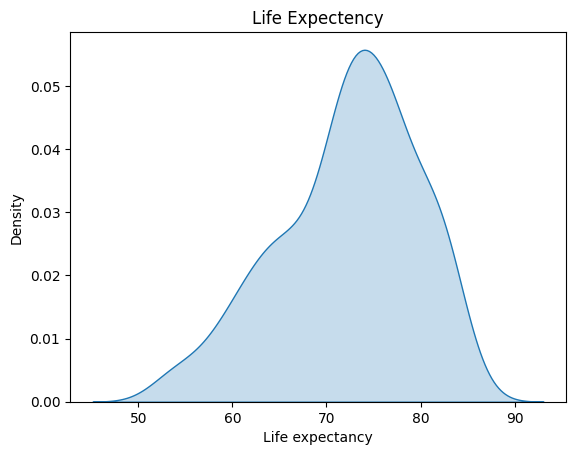

In [118]:
sb.kdeplot(df,x='Life expectancy',fill=True)
plt.title('Life Expectency')
plt.show()

In [119]:
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate',
       'Capital/Major City', 'Co2-Emissions', 'Fertility Rate',
       'Forested Area (%)', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

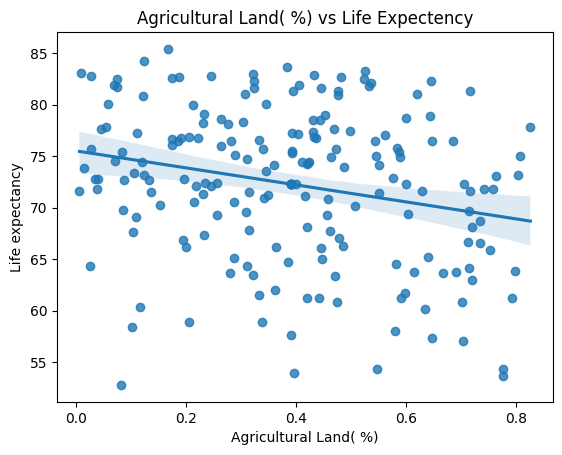

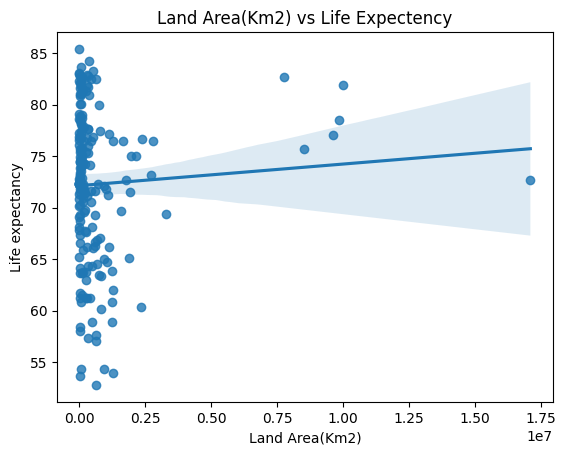

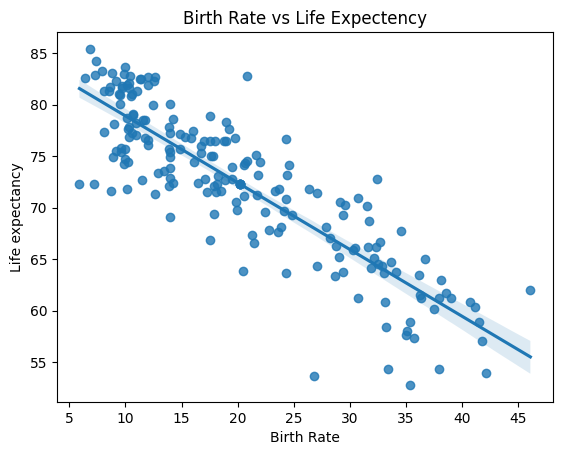

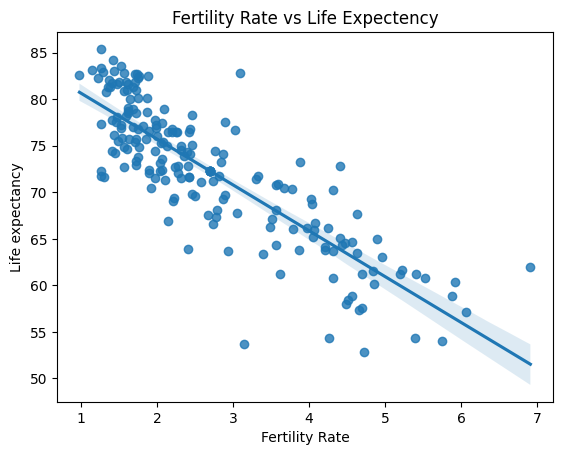

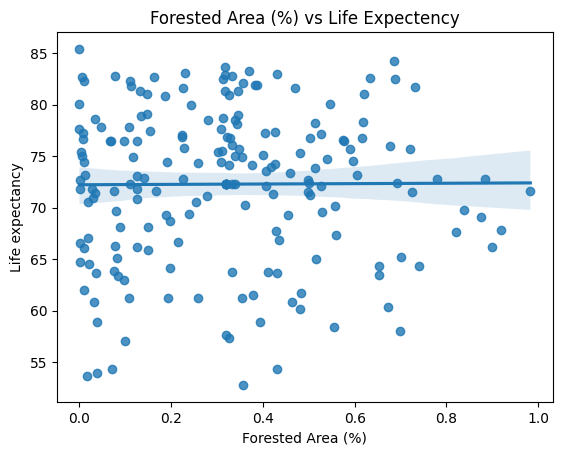

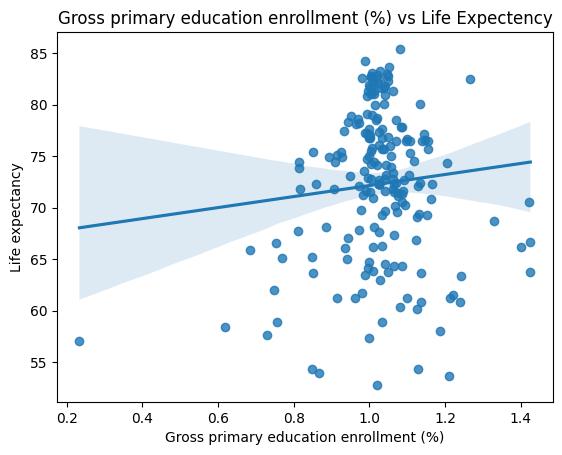

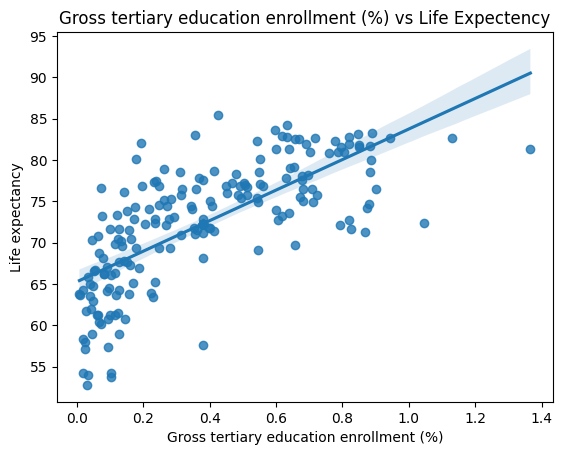

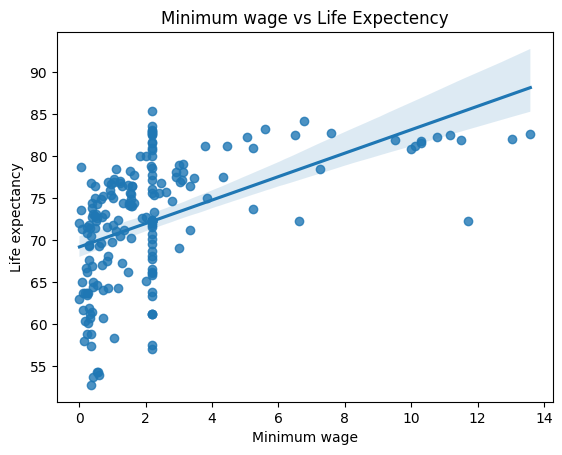

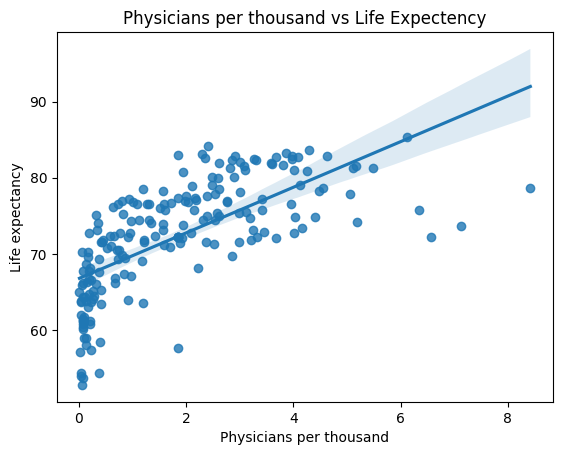

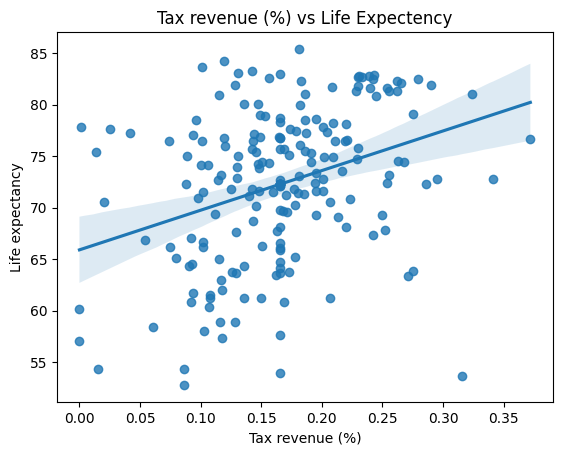

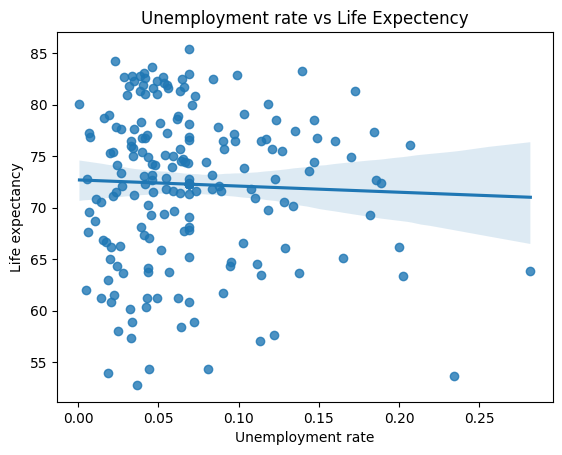

In [120]:
columns=['Agricultural Land( %)',
         'Land Area(Km2)',
         'Birth Rate',
         'Fertility Rate',
         'Forested Area (%)',
         'Gross primary education enrollment (%)',
         'Gross tertiary education enrollment (%)',
         'Minimum wage',
         'Physicians per thousand',
         'Tax revenue (%)',
         'Unemployment rate']
for column in columns:
    sb.regplot(x=df[column],y=df['Life expectancy'])
    plt.title(f'{column} vs Life Expectency')
    plt.show()

Insights:Both birth rate and fertility rate seem to be negatively correlated with life expectancy. In other words, increases in birth rate and fertility rate are associated with a descrease in life expectancy.

In contrast, both gross tertiary education enrollment and physicians per thousand seem to be positively correlated with life expectancy. In other words, increases in gross tertiary education enrollment and physicians per thousand are associated with an increase in life expectancy.

We can further explore these four variables.

In [121]:
df.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Capital/Major City,Co2-Emissions,Fertility Rate,Forested Area (%),GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,0.581,652230.0,323000.0,32.49,Kabul,8672.0,4.47,0.021,1.910135e+10,1.040,0.097000,47.9,Kabul,64.500000,638.000000,0.43,Pashto,78.4,0.28,38041754.0,0.489000,0.09300,0.714000,0.111200,9797273.0,33.939110,67.709953
1,Albania,105.0,0.431,28748.0,9000.0,11.78,Tirana,4536.0,1.62,0.281,1.527808e+10,1.070,0.550000,7.8,Tirana,78.500000,15.000000,1.12,Albanian,56.9,1.20,2854191.0,0.557000,0.18600,0.366000,0.123300,1747593.0,41.153332,20.168331
2,Algeria,18.0,0.174,2381741.0,317000.0,24.28,Algiers,150006.0,3.02,0.008,1.699882e+11,1.099,0.514000,20.1,Algiers,76.700000,112.000000,0.95,Arabic,28.1,1.72,43053054.0,0.412000,0.37200,0.661000,0.117000,31510100.0,28.033886,1.659626
3,Andorra,164.0,0.400,468.0,NaN,7.20,Andorra la Vella,469.0,1.27,0.340,3.154058e+09,1.064,0.379634,2.7,Andorra la Vella,72.279679,160.392265,6.63,Catalan,36.4,3.33,77142.0,0.627381,0.16574,0.408224,0.068864,67873.0,42.506285,1.521801
4,Angola,26.0,0.475,1246700.0,117000.0,40.73,Luanda,34693.0,5.52,0.463,9.463542e+10,1.135,0.093000,51.6,Luanda,60.800000,241.000000,0.71,Portuguese,33.4,0.21,31825295.0,0.775000,0.09200,0.491000,0.068900,21061025.0,-11.202692,17.873887


Birth Rate:tends the number of live births per 1,000 people in a population per year
 count    195.000000
mean      20.214974
std        9.790765
min        5.900000
25%       11.450000
50%       18.250000
75%       28.445000
max       46.080000
Name: Birth Rate, dtype: float64


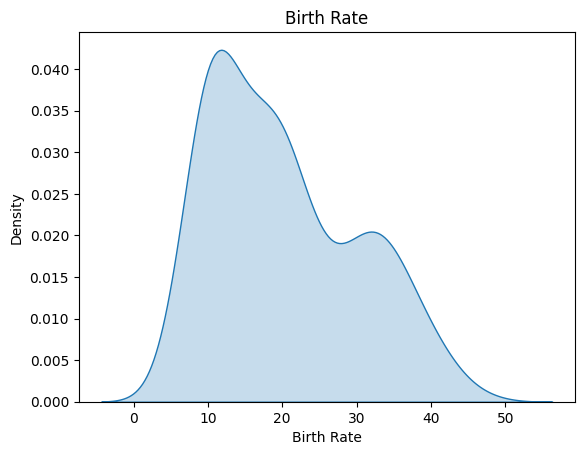

In [125]:
# Birth Rate
print('Birth Rate:tends the number of live births per 1,000 people in a population per year\n',
      df['Birth Rate'].describe())
sb.kdeplot(df,x='Birth Rate',fill=True)
plt.title('Birth Rate')
plt.show()

Fertility Rate: The fertility rate is a measure of the average number of children a woman is expected to have during her reproductive years
 count    195.000000
mean       2.698138
std        1.258921
min        0.980000
25%        1.710000
50%        2.270000
75%        3.565000
max        6.910000
Name: Fertility Rate, dtype: float64


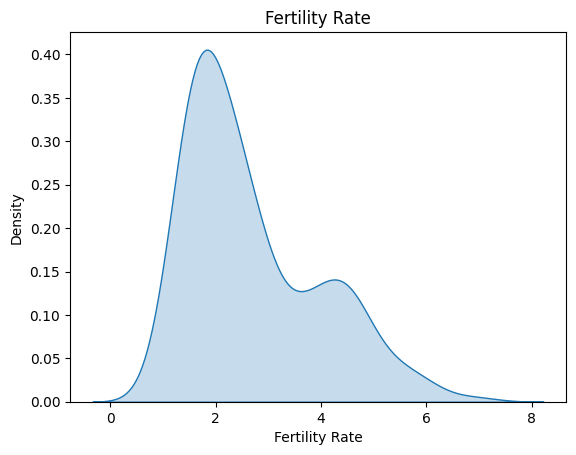

In [127]:
# Fertility Rate
print('Fertility Rate: The fertility rate is a measure of the average number of children a woman is expected to have during her reproductive years\n',
      df['Fertility Rate'].describe())
sb.kdeplot(df,x='Fertility Rate',fill=True)
plt.title("Fertility Rate")
plt.show()

Gross Tertiary Education Enrollment (%): Gross enrollment ratio for tertiary education
 count    195.000000
mean       0.379634
std        0.283416
min        0.008000
25%        0.126500
50%        0.352000
75%        0.611000
max        1.366000
Name: Gross tertiary education enrollment (%), dtype: float64


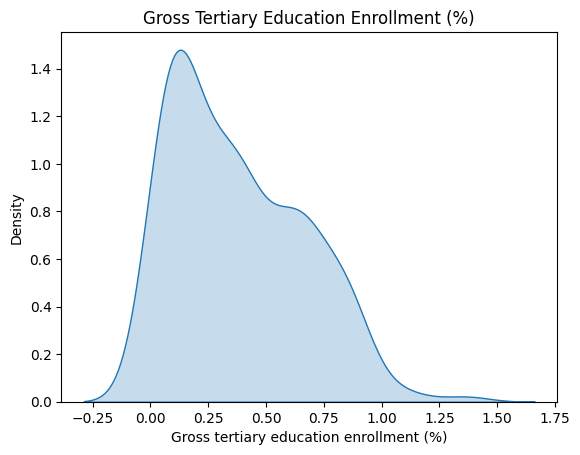

Physicians per Thousand: Number of physicians per thousand people
 count    195.000000
mean       1.839840
std        1.653596
min        0.010000
25%        0.360000
50%        1.570000
75%        2.875000
max        8.420000
Name: Physicians per thousand, dtype: float64


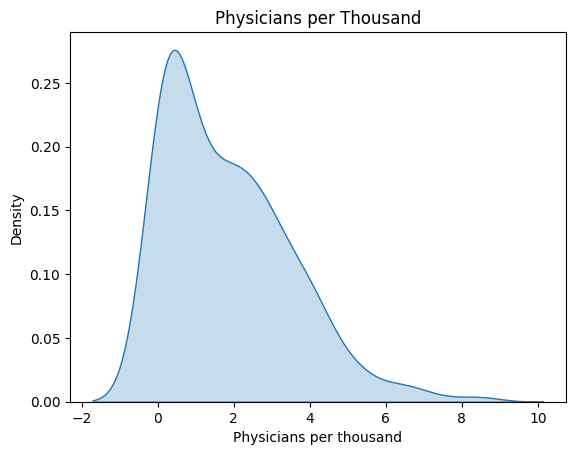

In [129]:
# Gross tertiary education enrollment

print('Gross Tertiary Education Enrollment (%): Gross enrollment ratio for tertiary education\n',
      df['Gross tertiary education enrollment (%)'].describe())
sb.kdeplot(df,x='Gross tertiary education enrollment (%)',fill=True)
plt.title('Gross Tertiary Education Enrollment (%)')
plt.show()

# Physician per thousand

print('Physicians per Thousand: Number of physicians per thousand people\n',
      df['Physicians per thousand'].describe())
sb.kdeplot(df,x='Physicians per thousand',fill=True)
plt.title('Physicians per Thousand')
plt.show()

